### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# 1. Análise do faturamento



In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
faturamentos = [loja['Preço'].sum(), loja2['Preço'].sum(), loja3['Preço'].sum(), loja4['Preço'].sum()]

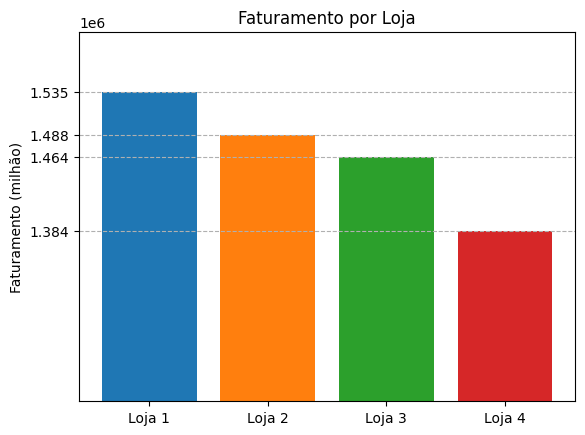

In [4]:
for i, faturamento in enumerate(faturamentos):
#   print(f'O faturamento da loja {i+1} é {faturamento}')
  plt.bar(f'Loja {i+1}', faturamento)

plt.title('Faturamento por Loja')
plt.ylabel('Faturamento (milhão)')
# plt.yscale('linear')
# plt.grid()
plt.yticks(np.append([10**6, 2*10**6], faturamentos))
plt.ylim(1.2*10**6, 1.6*10**6)
plt.grid(linestyle='--', axis='y')
plt.show()

# 2. Vendas por Categoria

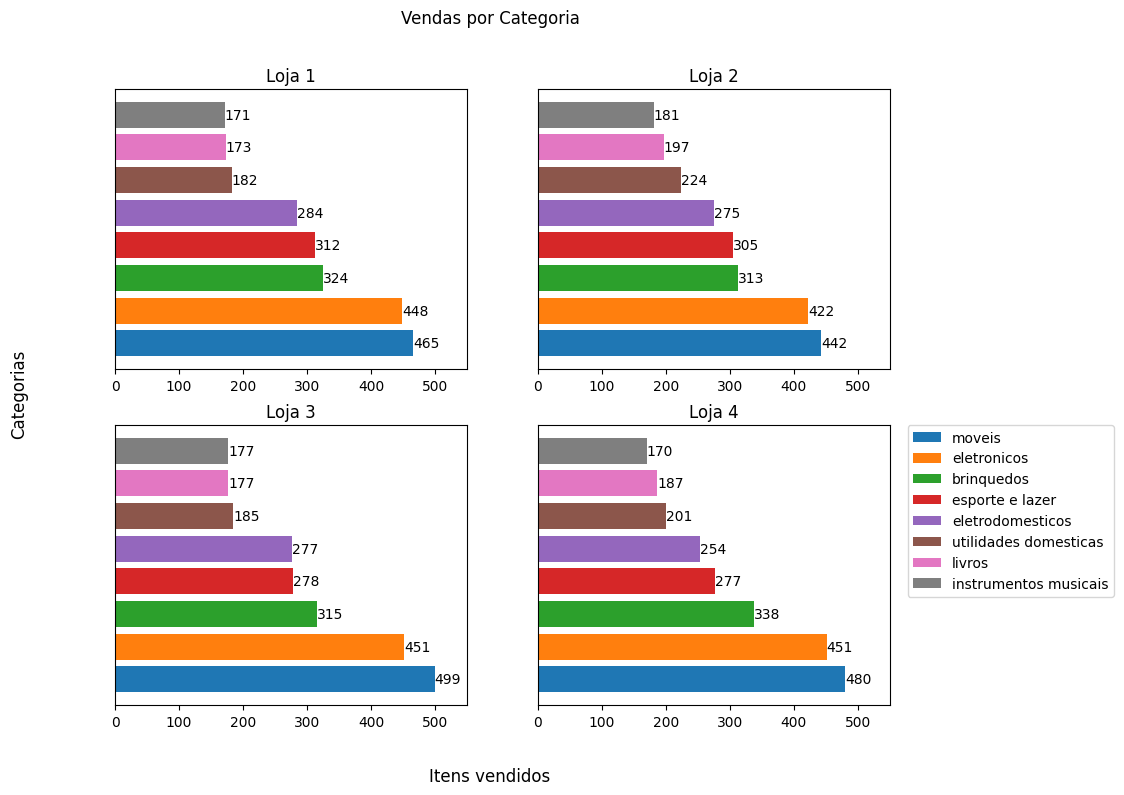

In [5]:
lojas = [loja, loja2, loja3, loja4]

categorias = loja['Categoria do Produto'].unique()
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
n = 0
for ax_row in ax:
  for ax_column in ax_row:
    ax_column.set_title(f'Loja {n + 1}')

    dt = lojas[n]['Categoria do Produto'].value_counts()
    for index in dt.index:
      rects = ax_column.barh(index, dt[index], label=index)
      ax_column.bar_label(rects)
      ax_column.set_yticks([])
      ax_column.set_xlim(0, 550)

    if n == 3:
      ax_column.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
    n += 1

  fig.supylabel('Categorias')
  fig.supxlabel('Itens vendidos')
  fig.suptitle('Vendas por Categoria')
  fig.show()
  fig.savefig('vendas_por_categoria.png')


# 3. Média de Avaliação das Lojas


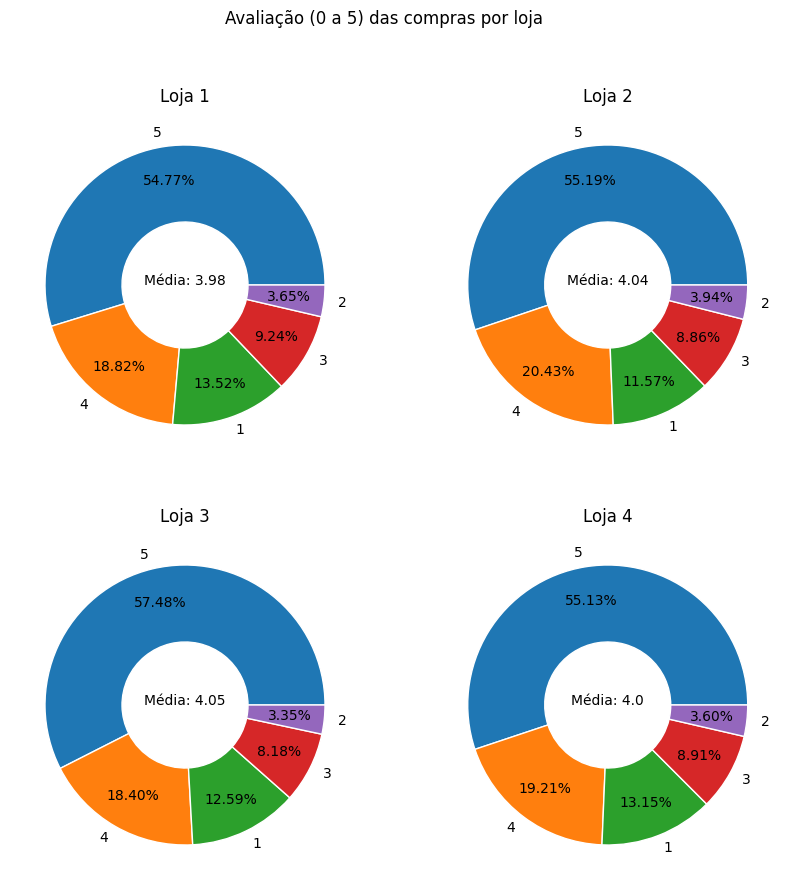

In [6]:
fig, ax = plt.subplots(2,2, figsize=(10, 10))

fig.suptitle('Avaliação (0 a 5) das compras por loja')

n = 0
for axrow in ax:
  for axcolumn in axrow:
    axcolumn.set_title(f'Loja {n+1}')

    dt = lojas[n]['Avaliação da compra'].value_counts()
    axcolumn.pie(dt, wedgeprops=dict(width=0.55, edgecolor='w'), labels=dt.index, autopct='%1.2f%%', pctdistance=0.75)
    axcolumn.text(0, 0, f'Média: {lojas[n]['Avaliação da compra'].mean().round(2)}', ha='center')

    n += 1

  fig.show()
  fig.savefig('avaliacao_por_loja.png')


# 4. Produtos Mais e Menos Vendidos

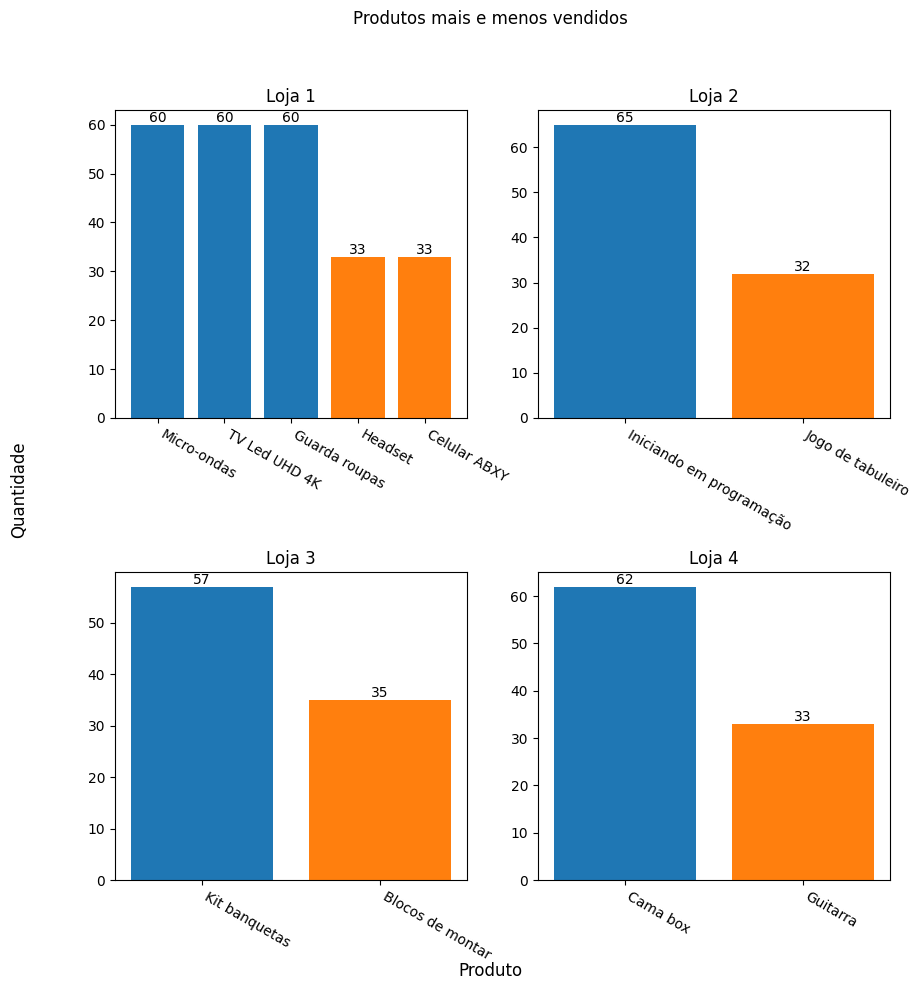

In [7]:
fig, ax = plt.subplots(2,2, figsize=(10, 10), )

fig.suptitle('Produtos mais e menos vendidos')
fig.supxlabel('Produto')
fig.supylabel('Quantidade')
# fig.tight_layout(pad=5)

n = 0
for axrow in ax:
  for axcolumn in axrow:
    _prod_loja = lojas[n]['Produto'].value_counts()

    dt_max = _prod_loja[(_prod_loja == _prod_loja.max())]
    b1 = axcolumn.bar(dt_max.index, dt_max)
    axcolumn.bar_label(b1)

    dt_min = _prod_loja[(_prod_loja == _prod_loja.min())]
    b2 = axcolumn.bar(dt_min.index, dt_min)
    axcolumn.bar_label(b2)

    axcolumn.set_title(f'Loja {n+1}')
    axcolumn.set_xticks(axcolumn.get_xticks())
    axcolumn.set_xticklabels(axcolumn.get_xticklabels(), rotation=-30, ha='left')

    n += 1

plt.subplots_adjust(hspace=0.5)
plt.show()

# 5. Frete Médio por Loja